In [4]:
from fastai.vision.all import *
from fastai.text.all import *

In [2]:
import pickle5 as pickle
with open( "../datasets/AMPsNonAMPs_df.239.plk", 'rb') as file:
    AMPs_df = pickle.load(file)

In [5]:
AMPs_df.drop_duplicates(subset=['Sequence'],inplace=True)
f = TrainTestSplitter(test_size=0.2, random_state=42)
train_splits,test_splits = f(AMPs_df)
df =AMPs_df[["reps","class"]]

In [6]:
df

,reps,class
2080,"[0.006758428644388914, -0.010547993704676628, 0.031261444091796875, -0.005155869293957949, -0.02523704431951046, 0.023993119597434998, -0.14176025986671448, -0.020764851942658424, -0.00997183471918106, 0.014040293172001839, -0.1839676797389984, 0.006789750885218382, 0.050707846879959106, 0.09588630497455597, 0.013936350122094154, 0.005397438537329435, 0.013097807765007019, 0.0175834558904171, 0.09487514197826385, -0.010816225782036781, -0.002639328595250845, 0.048970308154821396, 0.09312494844198227, -0.060179468244314194, 0.021875649690628052, 0.056447677314281464, 0.04231966659426689, 0....",0
2112,"[0.009842261672019958, -0.09050261229276657, 0.03110605478286743, 0.0008207791834138334, -0.15420129895210266, 0.040223658084869385, -0.2147483080625534, -0.004495155531913042, -0.010145515203475952, 0.05254765599966049, 0.3027239739894867, 0.006729503162205219, 0.04539880529046059, 0.09737258404493332, 0.01085548847913742, 0.00521036796271801, 0.03284343704581261, -0.046969059854745865, 0.13575738668441772, -0.010318098589777946, 0.0007791287498548627, 0.03232187777757645, 0.05450339987874031, -0.05239338427782059, 0.015742694959044456, -0.07851968705654144, 0.04925275221467018, 0.0167158...",0
2223,"[0.005940052680671215, -0.01924821361899376, 0.007379412185400724, -0.0022005224600434303, 0.05571150779724121, -0.07562820613384247, -0.06257694214582443, -0.11793282628059387, -0.008490757085382938, 0.00252351863309741, -0.20050401985645294, 0.005732868332415819, 0.02776007540524006, 0.35442790389060974, 0.00840016920119524, 0.0051325648091733456, 0.03696467727422714, -0.0038238801062107086, 0.0507405661046505, -0.01144462451338768, 0.0007211174233816564, 0.02076650597155094, 0.17392949759960175, -0.07934756577014923, -0.0052897073328495026, -0.03389612212777138, -0.13142621517181396, 0....",0
2232,"[0.010578776709735394, -0.05168537050485611, 0.011215719394385815, 0.0024818736128509045, -0.09051468968391418, 0.03733977675437927, -0.31331607699394226, -0.013307934626936913, -0.010218153707683086, 0.09730416536331177, 0.06118925288319588, 0.006391335278749466, 0.052020635455846786, 0.07089856266975403, 0.008996115997433662, 0.005364380311220884, 0.01773442141711712, -0.04047108814120293, 0.12245155870914459, -0.011256278492510319, 0.001064630807377398, 0.030760550871491432, 0.04714738577604294, -0.03860870376229286, 0.009660879150032997, -0.028168514370918274, 0.028785163536667824, 0.0...",0
2315,"[0.004393417853862047, -0.061859458684921265, 0.02191689983010292, -0.005814671516418457, 0.08874405175447464, 0.03617114946246147, -0.16096949577331543, -0.051187913864851, -0.011859177611768246, 0.010787446983158588, -0.17499606311321259, 0.006024373695254326, 0.04639450088143349, 0.08584555983543396, 0.015405037440359592, 0.005088319536298513, 0.020662138238549232, -0.03714631870388985, 0.15971605479717255, -0.016994798555970192, -0.0031125349923968315, 0.03648747131228447, 0.08750495314598083, -0.03844388201832771, 0.04330052435398102, 0.07262444496154785, 0.003322275122627616, 0.01489...",0
...,...,...
41948,"[0.05190926417708397, 0.029500924050807953, -0.04059634730219841, 0.05533552169799805, 0.04639345034956932, 0.06202308461070061, -0.5001407265663147, 0.04252341389656067, -0.060233499854803085, 0.24126192927360535, -0.2476365864276886, 0.042448800057172775, 0.06313338875770569, 0.09316979348659515, 0.05027041584253311, 0.04135901853442192, 0.04836776852607727, -0.02553330361843109, 0.05607938766479492, -0.04796554893255234, 0.04431964457035065, 0.06487283855676651, 0.0990154892206192, 0.030361544340848923, 0.0559333972632885, 0.13986468315124512, 0.19147765636444092, 0.06317244470119476, 0...",1
41950,"[0.05131299048662186, -0.013223196379840374, -0.043859973549842834, 0.05532696470618248, 0.04229993745684624, 0.06508596241474152, -0.5350171327590942, 0.043549686670303345, -0.0604657344520092, 0.339354932308197, -0.24247944355010986, 0.042404189705848694, 0.0682339072227478, 0.09775866568088531, 0.0501311831176

In [40]:
df.iloc[0]['reps']

AttributeError: 'list' object has no attribute 'values'

In [6]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_splits))
splits

((#26848) [33488,13575,21729,15,25125,10287,570,11605,23004,27183...],
 (#6712) [32601,18586,16606,21052,17504,28351,32202,21204,26439,9121...])

In [ ]:
#df['reps'].apply(tuple).value_counts()
df_new = df.reps.apply(pd.Series).astype(np.float64)
df_new['class'] = df['class']
df_new.columns = df_new.columns.astype(str)


In [ ]:
to = TabularPandas(df_new , cont_names  =reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

## NLP

In [18]:
dls_lm = TextDataLoaders.from_df(df, path='',seq_len=1900, valid_pct=0.2, is_lm=True,label_col="class",
                                 text_col ='reps',y_names='class', y_block = CategoryBlock)


In [ ]:
dls_lm.show_batch()

In [22]:
learner = language_model_learner(dls_lm, AWD_LSTM,  metrics=[accuracy])

In [27]:
learner

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=6.309573450380412e-07)

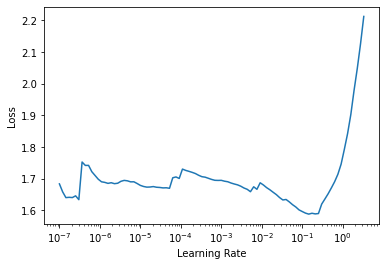

In [24]:
learner.lr_find()

In [29]:
learner.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.538449,1.062372,0.813522,00:12


In [31]:
learner.unfreeze()

SuggestedLRs(lr_min=0.0013182567432522773, lr_steep=0.0006918309954926372)

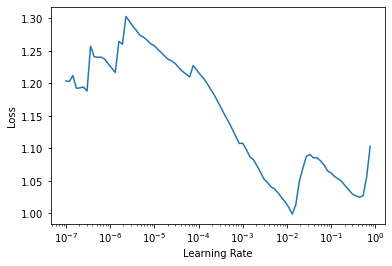

In [32]:
learner.lr_find()

In [33]:
learner.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.117141,0.840790,0.835133,00:17
1,0.929807,0.635278,0.871468,00:16
2,0.822329,0.604033,0.874628,00:16
3,0.760324,0.594598,0.874558,00:16
4,0.728163,0.593250,0.874693,00:16


In [42]:
learner.predict("This was a great movie!")

'Xxunk xxunk xxunk xxunk xxunk xxunk ,'